In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import re

In [3]:
data_one=pd.read_csv("one bedroom.csv")
data_two=pd.read_csv("two bedroom.csv")
data_three=pd.read_csv("three bedroom.csv")
data_one.drop('Ambient Temperature',axis=1,inplace=True)
data_two.drop('Ambient Temperature',axis=1,inplace=True)
data_three.drop('Ambient Temperature',axis=1,inplace=True)

In [4]:
data_one.head()

,Time,Global Solar(kW/m2),PV Cell Temperature(C),Wind Speed(m/s),AC Load(kW)
0,01/01/2007 00:00,0.0,23.72726,2.856398,0.106465
1,01/01/2007 01:00,0.0,23.72726,2.546373,0.091539
2,01/01/2007 02:00,0.0,23.72726,2.334827,0.252012
3,01/01/2007 03:00,0.0,23.72726,0.927367,0.266231
4,01/01/2007 04:00,0.0,23.72726,1.141059,0.415482


In [5]:
data_two.head()

,Time,Global Solar(kW/m2),PV Cell Temperature(C),Wind Speed(m/s),AC Load(kW)
0,01/01/2007 00:00,0.0,23.72726,2.856398,0.302041
1,01/01/2007 01:00,0.0,23.72726,2.546373,0.277418
2,01/01/2007 02:00,0.0,23.72726,2.334827,0.314410
3,01/01/2007 03:00,0.0,23.72726,0.927367,0.339892
4,01/01/2007 04:00,0.0,23.72726,1.141059,0.379358


In [6]:
data_three.head()

,Time,Global Solar(kW/m2),PV Cell Temperature(C),Wind Speed(m/s),AC Load(kW)
0,01/01/1900 00:00,0.0,23.72726,2.856398,0.267362
1,01/01/2007 01:00,0.0,23.72726,2.546373,0.261268
2,01/01/2007 02:00,0.0,23.72726,2.334827,0.297415
3,01/01/2007 03:00,0.0,23.72726,0.927367,0.340475
4,01/01/2007 04:00,0.0,23.72726,1.141059,0.390449


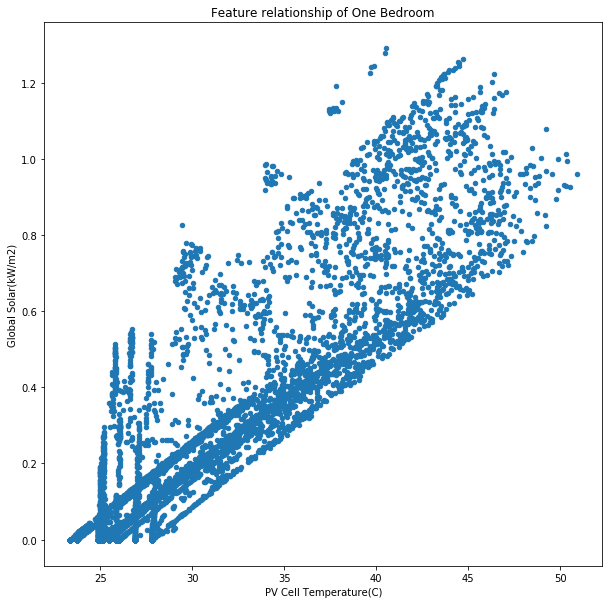

In [24]:
data_one.plot(x='PV Cell Temperature(C)',y='Global Solar(kW/m2)',kind='scatter',figsize=(10,10))
plt.title("Feature relationship of One Bedroom")
plt.savefig('One_bedroom.png')

In [7]:
data_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    8760 non-null   object 
 1   Global Solar(kW/m2)     8760 non-null   float64
 2   PV Cell Temperature(C)  8760 non-null   float64
 3   Wind Speed(m/s)         8760 non-null   float64
 4   AC Load(kW)             8760 non-null   float64
dtypes: float64(4), object(1)
memory usage: 342.3+ KB


# DATA ENGINEERING

In [27]:
#one room
#Time Feature
data_one['Month']=data_one['Time'].apply(lambda x:re.search(r'^\d+',x).group(0)).astype(np.int64)
data_one['Day']=data_one['Time'].apply(lambda x:re.search(r'(?<=\/)\d+(?=\/)',x).group(0)).astype(np.int64)
data_one['Hour']=data_one['Time'].apply(lambda x:re.search(r'(^\d+)',x).group(0)).astype(np.int64)
data_one=data_one.drop('Time',axis=1)



In [28]:
data_one.to_csv('one_room.csv',index=False)

In [29]:
#Two rooms
data_two['Month']=data_two['Time'].apply(lambda x:re.search(r'^\d+',x).group(0)).astype(np.int64)
data_two['Day']=data_two['Time'].apply(lambda x:re.search(r'(?<=\/)\d+(?=\/)',x).group(0)).astype(np.int64)
data_two['Hour']=data_two['Time'].apply(lambda x:re.search(r'(^\d+)',x).group(0)).astype(np.int64)
data_two=data_two.drop('Time',axis=1)


In [30]:
#Three Bedrooms
data_three['Month']=data_three['Time'].apply(lambda x:re.search(r'^\d+',x).group(0)).astype(np.int64)
data_three['Day']=data_three['Time'].apply(lambda x:re.search(r'(?<=\/)\d+(?=\/)',x).group(0)).astype(np.int64)
data_three['Hour']=data_three['Time'].apply(lambda x:re.search(r'(^\d+)',x).group(0)).astype(np.int64)
data_three=data_three.drop('Time',axis=1)

In [31]:
data_two.head()

,Global Solar(kW/m2),PV Cell Temperature(C),Wind Speed(m/s),AC Load(kW),Month,Day,Hour
0,0.0,23.72726,2.856398,0.302041,1,1,1
1,0.0,23.72726,2.546373,0.277418,1,1,1
2,0.0,23.72726,2.334827,0.314410,1,1,1
3,0.0,23.72726,0.927367,0.339892,1,1,1
4,0.0,23.72726,1.141059,0.379358,1,1,1


In [32]:
data_three.head()

,Global Solar(kW/m2),PV Cell Temperature(C),Wind Speed(m/s),AC Load(kW),Month,Day,Hour
0,0.0,23.72726,2.856398,0.267362,1,1,1
1,0.0,23.72726,2.546373,0.261268,1,1,1
2,0.0,23.72726,2.334827,0.297415,1,1,1
3,0.0,23.72726,0.927367,0.340475,1,1,1
4,0.0,23.72726,1.141059,0.390449,1,1,1


In [33]:
train, test, valid=data_one[:6000],data_one[6000:7000],data_one[7000:]

In [34]:
train.shape,test.shape,valid.shape

((6000, 7), (1000, 7), (1760, 7))

In [35]:
#x_train,y_train=x.to_numpy(),y.to_numpy()
x_train,y_train=train.drop('PV Cell Temperature(C)',axis=1).to_numpy(),train['PV Cell Temperature(C)'].to_numpy()
x_val,y_val=valid.drop('PV Cell Temperature(C)',axis=1).to_numpy(),valid['PV Cell Temperature(C)'].to_numpy()
x_test,y_test=test.drop('PV Cell Temperature(C)',axis=1).to_numpy(),test['PV Cell Temperature(C)'].to_numpy()

x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape

((6000, 6), (6000,), (1760, 6), (1760,), (1000, 6), (1000,))

In [36]:
scaler=StandardScaler().fit(x_train[:])
def preprocessor(x):
    A=np.copy(x)
    A[: , :]=scaler.transform(A[:,:])
    return A

x_train,x_val,x_test=preprocessor(x_train),preprocessor(x_val),preprocessor(x_test)



In [37]:
x_train.shape,x_val.shape,x_test.shape

((6000, 6), (1760, 6), (1000, 6))

# MODEL TRAINING

In [38]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [39]:
lm=LinearRegression().fit(x_train,y_train)
mse(lm.predict(x_train),y_train,squared=False),mse(lm.predict(x_val),y_val,squared=False)


(2.809081423849909, 2.5050545777171647)

In [40]:
#Kernel nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=8).fit(x_train,y_train)
mse(knn.predict(x_train),y_train,squared=False),mse(knn.predict(x_val),y_val,squared=False)

(1.3331038598932752, 2.1455671414905284)

In [41]:
#Random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=7).fit(x_train,y_train)
mse(rf.predict(x_train),y_train,squared=False),mse(rf.predict(x_val),y_val,squared=False)

(1.2276821720365994, 1.923104179255878)

In [42]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gradB=GradientBoostingRegressor(n_estimators=300).fit(x_train,y_train)
mse(gradB.predict(x_train),y_train,squared=False),mse(gradB.predict(x_val),y_val,squared=False)

(1.1547946671960376, 1.337331258356786)

In [43]:
#Neural Network
nn=Sequential()
nn.add(InputLayer((6,)))
nn.add(Dense(2,'relu'))
nn.add(Dense(1,'linear'))

optimizer=Adam(learning_rate=.1)
cp=ModelCheckpoint('pyth',save_best_only=True)



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [44]:
nn.compile(optimizer=optimizer,loss='mse',metrics=[RootMeanSquaredError()])
nn.fit(x=x_train,y=y_train,validation_data=(x_val,y_val),callbacks=[cp],epochs=80)

Train on 6000 samples, validate on 1760 samples
Epoch 1/80
6000/6000 [==============================] - 3s 511us/sample - loss: 181.4507 - root_mean_squared_error: 13.4704 - val_loss: 7.6240 - val_root_mean_squared_error: 2.7612
Epoch 2/80
6000/6000 [==============================] - 0s 56us/sample - loss: 8.3940 - root_mean_squared_error: 2.8972 - val_loss: 13.7724 - val_root_mean_squared_error: 3.7111
Epoch 3/80
6000/6000 [==============================] - 0s 66us/sample - loss: 8.4830 - root_mean_squared_error: 2.9126 - val_loss: 9.2488 - val_root_mean_squared_error: 3.0412
Epoch 4/80
6000/6000 [==============================] - 0s 63us/sample - loss: 8.3548 - root_mean_squared_error: 2.8905 - val_loss: 4.8033 - val_root_mean_squared_error: 2.1916
Epoch 5/80
6000/6000 [==============================] - 0s 55us/sample - loss: 8.3856 - root_mean_squared_error: 2.8958 - val_loss: 11.0823 - val_root_mean_squared_error: 3.3290
Epoch 6/80
6000/6000 [==============================] - 0s 58

Epoch 47/80
6000/6000 [==============================] - 0s 55us/sample - loss: 7.7970 - root_mean_squared_error: 2.7923 - val_loss: 4.7941 - val_root_mean_squared_error: 2.1895
Epoch 48/80
6000/6000 [==============================] - 0s 52us/sample - loss: 7.7975 - root_mean_squared_error: 2.7924 - val_loss: 5.9415 - val_root_mean_squared_error: 2.4375
Epoch 49/80
6000/6000 [==============================] - 0s 54us/sample - loss: 8.1519 - root_mean_squared_error: 2.8552 - val_loss: 6.5875 - val_root_mean_squared_error: 2.5666
Epoch 50/80
6000/6000 [==============================] - 0s 53us/sample - loss: 7.6954 - root_mean_squared_error: 2.7741 - val_loss: 3.4704 - val_root_mean_squared_error: 1.8629
Epoch 51/80
6000/6000 [==============================] - 0s 54us/sample - loss: 7.9255 - root_mean_squared_error: 2.8152 - val_loss: 8.0055 - val_root_mean_squared_error: 2.8294
Epoch 52/80
6000/6000 [==============================] - 0s 54us/sample - loss: 7.7598 - root_mean_squared_err

In [45]:
mse(gradB.predict(x_test),y_test,squared=False)

1.298810882111018

In [46]:
#pd.DataFrame(x_test)
prediction=gradB.predict(x_test)

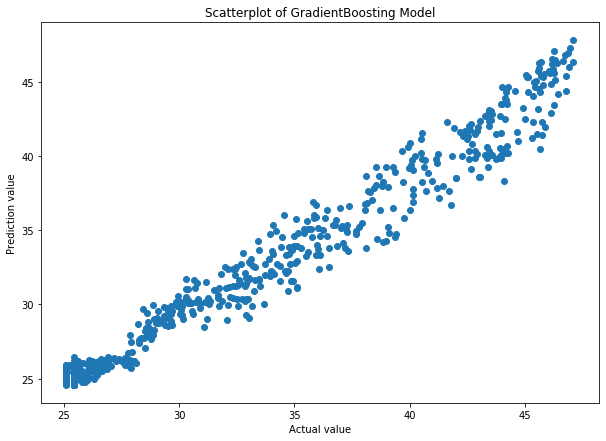

In [59]:
plt.figure(figsize=(10,7))
plt.scatter(y_test,prediction)
plt.xlabel("Actual value")
plt.ylabel("Prediction value")
plt.title("Scatterplot of GradientBoosting Model")
plt.savefig('Scatterplot_one_room.png')

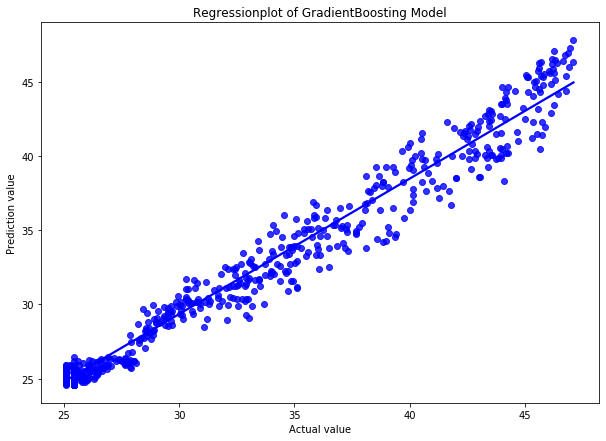

In [60]:
plt.figure(figsize=(10,7))
sns.regplot(x=y_test,y=prediction,ci=None,color='blue')
plt.xlabel("Actual value")
plt.ylabel("Prediction value")
plt.title("Regressionplot of GradientBoosting Model")
plt.savefig('Regressionplot_one_room.png')

In [67]:
result=pd.DataFrame(prediction,columns=['Predicted value'])
result.shape

(1000, 1)

In [74]:
result=pd.DataFrame(x_test)
result['PV Temp']=pd.DataFrame(y_test)
result['Temp Prediction']=pd.DataFrame(prediction)
result.head()


,0,1,2,3,4,5,PV Temp,Temp Prediction
0,-0.741829,-1.222913,-1.250835,1.826488,-0.830103,1.826488,25.11769,25.141339
1,-0.741829,-1.588619,-1.381191,1.826488,-0.830103,1.826488,25.11769,25.325898
2,-0.741829,-1.640577,-0.860788,1.826488,-0.830103,1.826488,25.11769,25.325898
3,-0.741829,-1.561707,-0.961286,1.826488,-0.830103,1.826488,25.11769,25.555927
4,-0.741829,-1.514031,-0.509529,1.826488,-0.830103,1.826488,25.11769,25.103862


In [76]:
result.to_csv("One Room Output.csv",index=False)